In [130]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

import matplotlib.pyplot as plt
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

import numpy as np
import seaborn as sns
sns.set()
#sns.set(style="whitegrid")
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

# Numerische Algorithmen

## Newton-Raphson-Verfahren

Eines der einfachsten und auch ältesten Verfahren zur Suche von Nullstellen von Funktionen ist das [Newton-Raphson-Verfahren](https://de.wikipedia.org/wiki/Newtonverfahren), welches bereits im 17-ten Jahrhundert entwickelt und eingestetzt wurde.

### Anwendungen
Das Finden von Nullstellen ist die Grundlage für viele Verfahren, welche z.B. für 
* das Lösen von nicht-linearen Gleichungen, 
* das Finden von Extremwerten, oder
* Optimierungsverfahren

eingesetzt werden kann.
 

### Grundidee 
Die Grundidee beruht auf einer iterativen Suche der Nullstelle $\sf x_{ns}$ einer stetig differenzierbaren Funktion $\sf f(x)$ mit Hilfe der ersten Ableitung $\sf f'(x)$. Durch das Anlegen von Tangenten an die aktuelle Näherung der Nullstelle $\sf x_i$ kann die nächste Näherung bestimmt werden. 

Bei gegebenen Startwert, $\sf x_0$ für den ersten Iterationsschritt ($\sf i=0$), können die folgenden Näherungen durch

$$\sf x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

berechnet werden. Dabei bestimmt die Wahl des Startwerts, welche der ggf. mehreren Nullstellen gefunden wird. 

### Beispiel 1

Gegeben ist die Funktion $\sf f(x) = 1 - x^2$. Die Ableitung ist gegeben durch $\sf f'(x) = -2x$ und die Nullstellen lauten $\sf x_{ns} = \{-1, 1\}$.

Bei einem Startwert von $\sf x_0 = 4$ führt zu folgender Iteration:

In [131]:
def f(x):
    return x**2 - 1
def fp(x):
    return 2*x

x0 = 0.3

print('Startwert x_0 = {:.4f}'.format(x0))
print()

n = 5
xi = [x0]
for i in range(1,n):
    xp = xi[i-1]
    xn = xp - (f(xp)/fp(xp))
    
    print('Iterationsschritt i = {:2d}, x_i = {:.4f}'.format(i, xp))
    print('   f(x_i)  = {:.4f}'.format(f(xp)))
    print('   fp(x_i) = {:.4f}'.format(fp(xp)))
    print('   x_(i+1) = {:.4f}'.format(xn))
    print()
    
    xi.append(xn)
    
print()
print('Endergebnis nach {} Iterationen: x_(ns) = {:.4f}'.format(n, xi[-1]))

Startwert x_0 = 0.3000

Iterationsschritt i =  1, x_i = 0.3000
   f(x_i)  = -0.9100
   fp(x_i) = 0.6000
   x_(i+1) = 1.8167

Iterationsschritt i =  2, x_i = 1.8167
   f(x_i)  = 2.3003
   fp(x_i) = 3.6333
   x_(i+1) = 1.1836

Iterationsschritt i =  3, x_i = 1.1836
   f(x_i)  = 0.4008
   fp(x_i) = 2.3671
   x_(i+1) = 1.0142

Iterationsschritt i =  4, x_i = 1.0142
   f(x_i)  = 0.0287
   fp(x_i) = 2.0285
   x_(i+1) = 1.0001


Endergebnis nach 5 Iterationen: x_(ns) = 1.0001


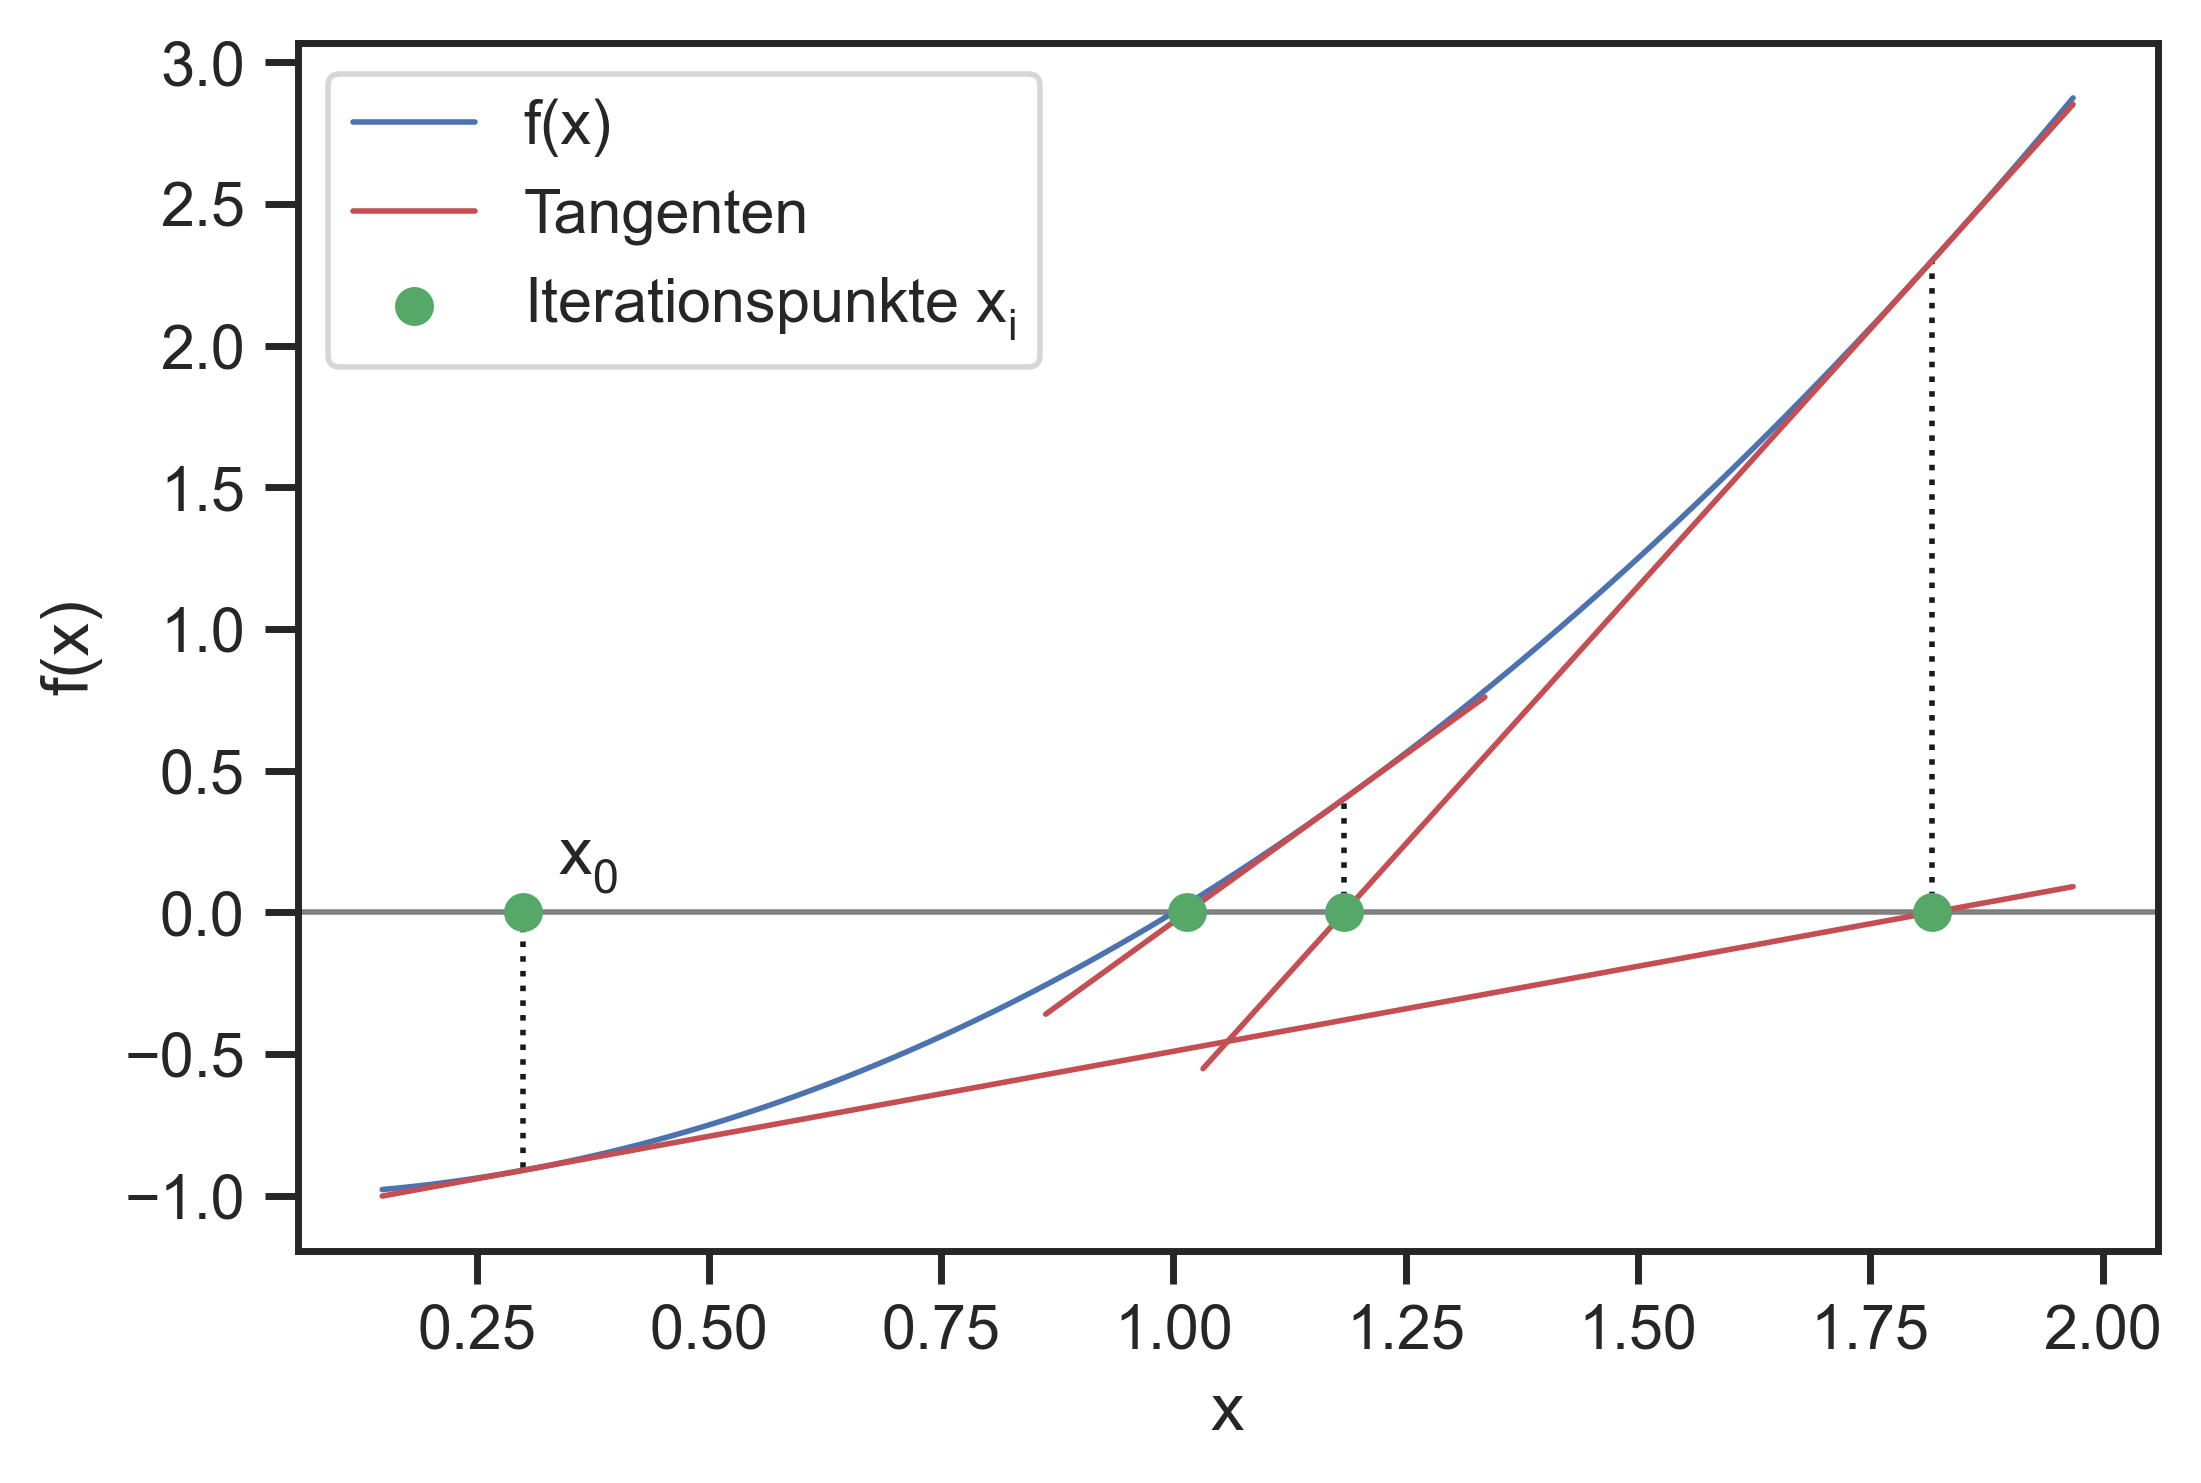

In [132]:
x_start = np.min(xi)
x_end = np.max(xi)

x_d = x_end - x_start

x_start -= 0.1 * x_d
x_end += 0.1 * x_d

xarr = np.linspace(x_start, x_end, 100)

plt.plot(xarr, f(xarr), label='f(x)')
plt.axhline(0, c='grey', zorder=0)
plt.xlabel('x')
plt.ylabel('f(x)')

y_d = np.max(f(xarr)) - np.min(f(xarr))

n_max = 3
first = True
for i in range(n_max):
    x = xi[i]
    xn = xi[i+1]
    plt.scatter(x, 0, c='C2', label='Iterationspunkte $x_i$' if first else None, zorder=3)
    plt.vlines(x, 0, f(x), ls=':', zorder=0)
    if x > xn:
        x_t1 = xn - 0.1*x_d
        x_t2 = x + 0.1*x_d
        y_t1 = - 0.1*x_d * fp(x)
        y_t2 = f(x) + 0.1*x_d * fp(x)
    else:
        x_t2 = xn + 0.1*x_d
        x_t1 = x - 0.1*x_d
        y_t2 = 0.1*x_d * fp(x)
        y_t1 = f(x) - 0.1*x_d * fp(x)
        
#     plt.plot([x, xn], [f(x), 0], c='C3')
    plt.plot([x_t1, x_t2], [y_t1, y_t2], c='C3', label='Tangenten' if first else None)

    first = False

text_y = 0.035 * y_d
plt.text(xi[0]+0.025*x_d, text_y, '$x_0$')
plt.scatter(xi[n_max], 0, c='C2', zorder=3)
# plt.text(xi[n_max], 0.035 * y_d, 'x_{}'.format(n_max))
plt.legend()
plt.savefig('bilder/newton_bsp1.png')

### Beispiel 2

Gegeben ist die Funktion $\sf f(x) = \sin(x) - 0.5$ mit der Ableitung $\sf f'(x) = \cos(x)$.

In [133]:
def f(x):
    return np.sin(x) -0.5
def fp(x):
    return np.cos(x)

x0 = 1.3

print('Startwert x_0 = {:.4f}'.format(x0))
print()

n = 5
xi = [x0]
for i in range(1,n):
    xp = xi[i-1]
    xn = xp - (f(xp)/fp(xp))
    
    print('Iterationsschritt i = {:2d}, x_i = {:.4f}'.format(i, xp))
    print('   f(x_i)  = {:.4f}'.format(f(xp)))
    print('   fp(x_i) = {:.4f}'.format(fp(xp)))
    print('   x_(i+1) = {:.4f}'.format(xn))
    print()
    
    xi.append(xn)
    
print()
print('Endergebnis nach {} Iterationen: x_(ns) = {:.4f}'.format(n, xi[-1]))

Startwert x_0 = 1.3000

Iterationsschritt i =  1, x_i = 1.3000
   f(x_i)  = 0.4636
   fp(x_i) = 0.2675
   x_(i+1) = -0.4329

Iterationsschritt i =  2, x_i = -0.4329
   f(x_i)  = -0.9195
   fp(x_i) = 0.9077
   x_(i+1) = 0.5801

Iterationsschritt i =  3, x_i = 0.5801
   f(x_i)  = 0.0481
   fp(x_i) = 0.8364
   x_(i+1) = 0.5226

Iterationsschritt i =  4, x_i = 0.5226
   f(x_i)  = -0.0009
   fp(x_i) = 0.8665
   x_(i+1) = 0.5236


Endergebnis nach 5 Iterationen: x_(ns) = 0.5236


No handles with labels found to put in legend.


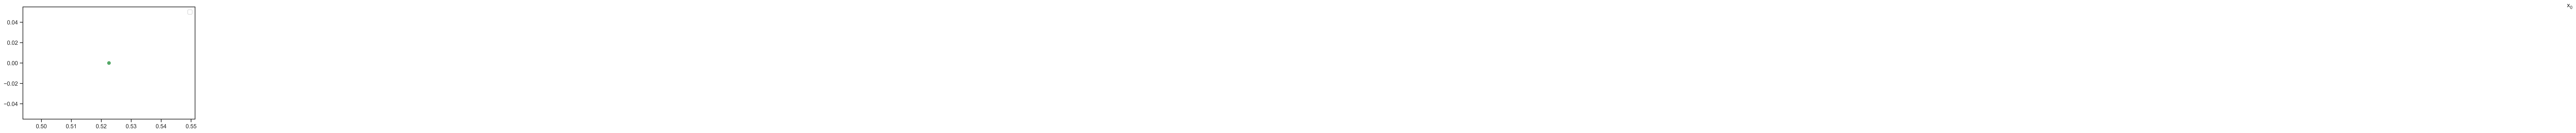

In [151]:
x_start = np.min(xi)
x_end = np.max(xi)

x_d = x_end - x_start

x_start -= 0.1 * x_d
x_end += 0.1 * x_d

xarr = np.linspace(x_start, x_end, 100)
yarr = f(xarr)
y_d = np.max(yarr) - np.min(yarr)


n_max = 3
first = True
for n in range(0, n_max+1):
    plt.plot(xarr, f(xarr), label='f(x)')
    plt.axhline(0, c='grey', zorder=0)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    for i in range(n):
        x = xi[i]
        xn = xi[i+1]
        c = 'C3'
        a = 1.0
        if i != n-1:
            c = 'gray'
            a = 0.3
        plt.scatter(x, 0, c=c, alpha=a, label='Iterationspunkte $x_i$' if first else None, zorder=3)
        plt.vlines(x, 0, f(x), color='grey', ls=':', zorder=0, alpha=a)
        if x > xn:
            x_t1 = xn - 0.1*x_d
            x_t2 = x + 0.1*x_d
            y_t1 = - 0.1*x_d * fp(x)
            y_t2 = f(x) + 0.1*x_d * fp(x)
        else:
            x_t2 = xn + 0.1*x_d
            x_t1 = x - 0.1*x_d
            y_t2 = 0.1*x_d * fp(x)
            y_t1 = f(x) - 0.1*x_d * fp(x)

    #     plt.plot([x, xn], [f(x), 0], c='C3')
        plt.plot([x_t1, x_t2], [y_t1, y_t2], c=c, alpha=a, label='Tangenten' if first else None)
        if i == n_max:
            plt.scatter(xn, 0, c='C4', zorder=3)
        first = False
    plt.savefig('bilder/newton_bsp2_step_{:02d}.png'.format(n))
    plt.clf()
    

text_y = 0.035 * y_d
plt.text(xi[0]+0.025*x_d, text_y, '$x_0$')
plt.scatter(xi[n_max], 0, c='C2', zorder=3)
# plt.text(xi[n_max], 0.035 * y_d, 'x_{}'.format(n_max))
plt.legend()
plt.savefig('bilder/newton_bsp2.png')

## Euler-Verfahren

Das explizite [Euler-Verfahren](https://de.wikipedia.org/wiki/Explizites_Euler-Verfahren) ist ein einfacher Algorithmus zur Bestimmung von Näherungslösungen von gewöhnlichen Differentialgleichungen, insbesondere Anfangswertprobleme. Das Verfahren wird hier anhand einer linearen Differentialgleichung 1. Ordnung demonstiert, hier ist $\sf y = y(t)$ eine Funktion der Zeit $\sf t$. Die Differentialgleichung lautet

$$\sf \dot y(t) + a(t)y(t) + b(t) = 0$$

Mit einem vorgegebenen Anfangswert $\sf y_0 = y(t_0)$ kann die Näherungslösung iterativ bis zur gewünschten Endzeit $\sf t_e$ bestimmt werden. Dazu muss das betrachtete Zeitintervall $\sf[t_0, t_e]$ in $\sf n_t$ Teilintervalle aufgeteilt werden. Die Länge eines Teilintervalls ist 

$$\sf \Delta t = \frac{t_e - t_0}{n_t}\quad .$$ 

Das iterative Verfahren beschreibt die Bestimmung der Lösung im nächsten Zeitinterval $\sf t_{i+1}$

$$\sf  y(t_{i+1}) = y(t_i) - \Delta t \big(a(t_i)y(t_i) + b(t_i)\big)\quad .$$

### Beispiel 1

Mit $\sf a(t) = 1$, $\sf b(t) = 0$ und einem Anfangswert von $\sf y_0 = 1$.